In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,257 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160980 files and d

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
#Define (str to float) & (Unit Conver)
def tofloat(Serise_) :
  for num in range(0, len(Serise_)) :
    if (str(type(Serise_[num])) != "<class 'str'>" ) : continue

    if (Serise_[num].endswith('K')) : 
      Serise_[num] = Serise_[num].replace("K","")
      Serise_[num] = float(Serise_[num])* 1000
    else :
      Serise_[num] = Serise_[num].replace("M","")
      Serise_[num] = float(Serise_[num])  * 1000000
  return Serise_

#Define (yearoveride)
def yearoveride(y, recent) :
  if (y < 100) :
    y +=2000
    if (y>recent) :
      y -= 100
  return y

def Normalize(value, df, region) : 
  value = value / df[region]
  return value

def Substr(string):
  return string[:-1]

In [ ]:
#Load DataSet
path = "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv"
df_origin = pd.read_csv(path, index_col=[0])

df_origin.tail(8)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16591,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010.0,Adventure,Aqua Plus,0,0,0.05,0
16592,Madden NFL 2005,PS2,2004.0,Sports,Electronic Arts,4.18,0.26,0.01,80K
16593,Minna no Chizu 2,PSP,2007.0,Misc,Zenrin,0,0,0.02,0
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03
16598,The King of Fighters '95,PS,1996.0,Fighting,Sony Computer Entertainment,0,0,0.16,0.01


### 0,1,2,10 등 연도데이의 오류를 수정
### k,M등의 단위를 통일된 숫자로 표기

In [ ]:
df_Vgame = df_origin

# error values
## 
df_Vgame['Year'] = df_Vgame['Year'].apply(yearoveride, recent = 2020)

# data convert
## Dtype convert : str -> float
## unit convert : (value)k -> (value)* 1000 / (value)M -> (value)* 1000000
df_Vgame[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]  = df_Vgame[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].apply(tofloat, axis = 1)
df_Vgame

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0


### 나라별 판매량의 총 합을 구함.

In [ ]:
# calcultate total_sales
df_Vgame['Total_Sales'] = df_Vgame[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)
df_Vgame.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0,200000.0
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0,10000.0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0,790000.0
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0,380000.0
16598,The King of Fighters '95,PS,1996.0,Fighting,Sony Computer Entertainment,0.0,0.0,160000.0,10000.0,170000.0


#**지역에 따라서 선호하는 게임 장르가 다를까**

### 지역에 따른 장르 선호도를 파악하기 위해 장르의 데이터가 결측값인 데이터는 삭제

In [ ]:
# missing values 
## drop out missing values from Year,Genre
df_Vgame = df_Vgame.dropna(subset=['Genre']).reset_index(drop=True)
df_Vgame.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
16543,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0,200000.0
16544,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0,10000.0
16545,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0,790000.0
16546,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0,380000.0
16547,The King of Fighters '95,PS,1996.0,Fighting,Sony Computer Entertainment,0.0,0.0,160000.0,10000.0,170000.0


### Pivot Table을 이용해 [장르별] [지역별] 데이터로 정리

In [ ]:
pdf_VgameGenre = pd.pivot_table(df_Vgame,
                           index = 'Genre',
                           values = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                           aggfunc = ['sum'])
region_list = ['EU_Sales', 'JP_Sales', 'NA_Sales', 'Other_Sales']
pdf_VgameGenre.columns = region_list
pdf_VgameGenre =  pdf_VgameGenre[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
pdf_VgameGenre.reset_index(inplace=True)
pdf_VgameGenre.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,874810000.0,522160000.0,157900000.0,186450000.0
1,Adventure,105660000.0,64050000.0,51950000.0,16810000.0
2,Fighting,223200000.0,101220000.0,87340000.0,36640000.0
3,Misc,408050000.0,212360000.0,105270000.0,74040000.0
4,Platform,446440000.0,201610000.0,130650000.0,51530000.0


### 지역 - 장르 별 판매량을 그래프로 표시

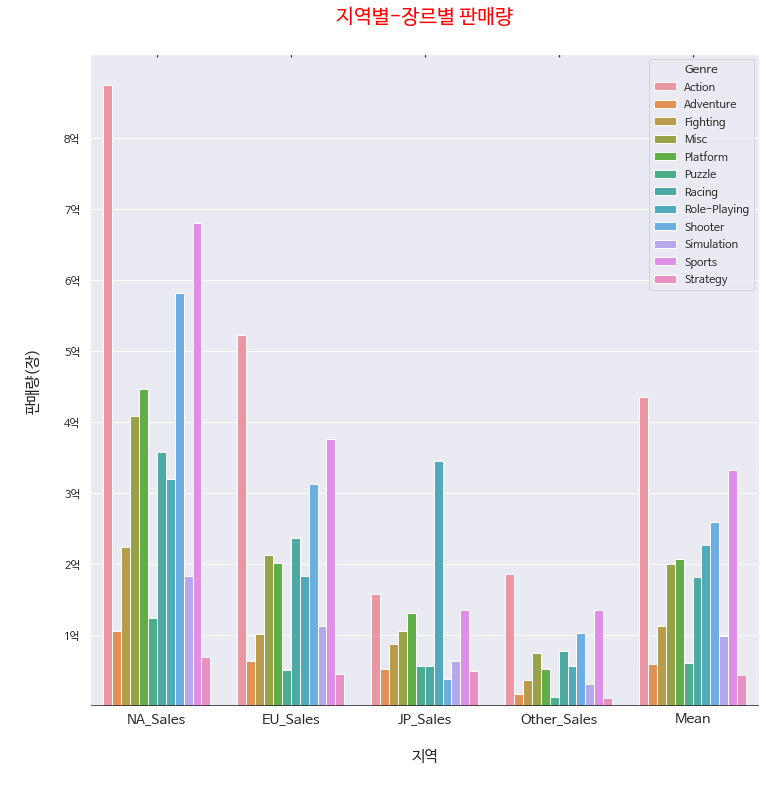

In [ ]:
df_tmp= pdf_VgameGenre.copy()

df_tmp['Mean'] = df_tmp[region_list].mean(axis=1)

tdf_Vgame = pd.melt(df_tmp,["Genre"], var_name="Region", value_name="Sales")
tdf_Vgame.head()

plt.figure(figsize=(12, 12))
sns.set_theme(style="darkgrid", font = 'NanumBarunGothic', font_scale= 1)
plt.hlines(y = 0, xmin=-0.5,xmax=4.5,linestyles= '-', colors = '#000000')
sns.barplot(x = 'Region',
            y='Sales',
            hue="Genre",
            data=tdf_Vgame)
xticklist, yticklist,xlabellist, ylabellist = [], [],[],[]
for x in range(0,9) : 
  yticklist.append(x*(10**8))
  if (x == 0) :
    ylabellist.append('')
  else :
    ylabellist.append(str(x)+'억')
    
plt.yticks(yticklist,ylabellist)
# plt.xticks(xticklist,xlabellist)
plt.rc('font', size=8)
plt.title("지역별-장르별 판매량\n", fontsize=20, color = 'Red')
plt.xlabel('\n지역\n', fontsize=15)
plt.ylabel('\n판매량(장)\n', fontsize=15)
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=14, top=True)

### 지역 - 장르 별 판매량은 스케일이 달라 비교하기 힘들기에 정규화를 진행.

In [ ]:
df_region = pd.DataFrame(data = pdf_VgameGenre.drop(['Genre'],axis=1).sum()).T
df_region

n_pdf_VgameGenre= pdf_VgameGenre

for key in region_list :
  n_pdf_VgameGenre[key] = n_pdf_VgameGenre[key].apply(Normalize,df = df_region, region = key)

n_pdf_VgameGenre['Mean'] = n_pdf_VgameGenre[region_list].mean(axis=1)

n_pdf_VgameGenre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Mean
0,Action,0.200078,0.215679,0.123539,0.235354,0.193662
1,Adventure,0.024166,0.026456,0.040645,0.021219,0.028121
2,Fighting,0.051048,0.041809,0.068334,0.046250,0.051860
3,Misc,0.093325,0.087715,0.082362,0.093460,0.089216
4,Platform,0.102106,0.083275,0.102219,0.065046,0.088161
5,Puzzle,0.028211,0.020954,0.044494,0.015804,0.027366
6,Racing,0.081693,0.097934,0.044127,0.097323,0.080269
7,Role-Playing,0.073082,0.075828,0.269884,0.071900,0.122674
8,Shooter,0.133091,0.129306,0.029950,0.129574,0.105480
9,Simulation,0.041845,0.046819,0.049838,0.039737,0.044560


### 정규화된 데이터간의 상관계수를 구함

In [ ]:
df_cov = df_tmp.drop('Genre',axis=1)
df_cov = df_cov.corr()
df_cov

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Mean
NA_Sales,1.000000,0.986691,0.281985,0.975300,0.982988
EU_Sales,0.986691,1.000000,0.276935,0.994328,0.981309
JP_Sales,0.281985,0.276935,1.000000,0.263143,0.439134
Other_Sales,0.975300,0.994328,0.263143,1.000000,0.971806
Mean,0.982988,0.981309,0.439134,0.971806,1.000000


### 정규화한 데이터를 시각화

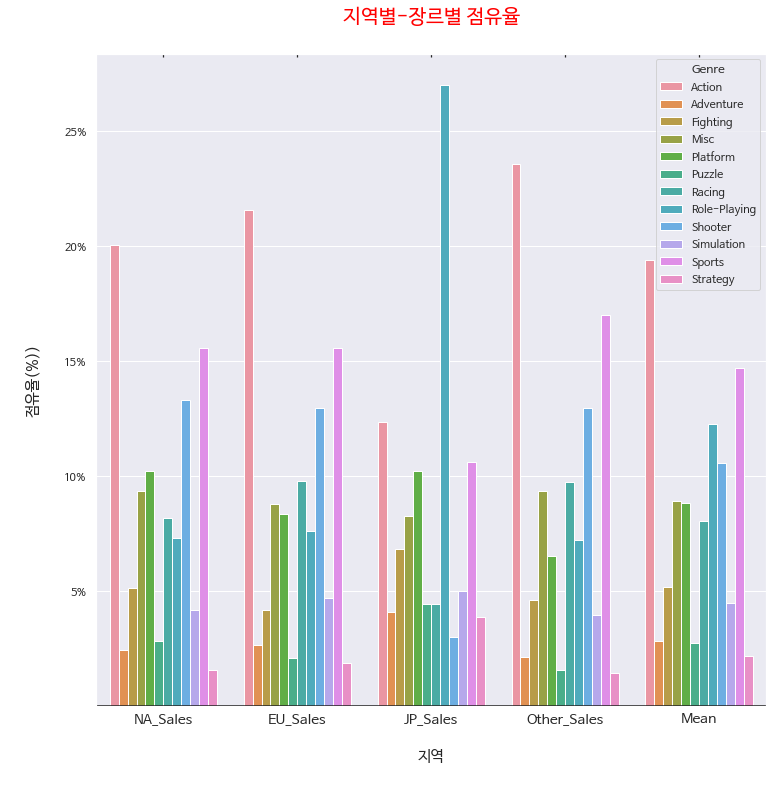

In [ ]:
tdf_Vgame = pd.melt(n_pdf_VgameGenre,["Genre"], var_name="Region", value_name="Sales")
tdf_Vgame.head()

plt.figure(figsize=(12, 12))
sns.set_theme(style="darkgrid", font = 'NanumBarunGothic', font_scale= 1)
plt.hlines(y = 0, xmin=-0.5,xmax=4.5,linestyles= '-', colors = '#000000')
sns.barplot(x = 'Region',
            y='Sales',
            hue="Genre",
            data=tdf_Vgame)
xticklist, yticklist,xlabellist, ylabellist = [], [],[],[]
for x in range(0,6) : 
  yticklist.append(x*0.05)
  if (x == 0) :
    ylabellist.append('')
  else :
    ylabellist.append(str(x*5)+'%')
    
plt.yticks(yticklist,ylabellist)
# plt.xticks(xticklist,xlabellist)
plt.rc('font', size=8)
plt.title("지역별-장르별 점유율\n", fontsize=20, color = 'Red')
plt.xlabel('\n지역\n', fontsize=15)
plt.ylabel('\n점유율(%))\n', fontsize=15)
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=14, top=True)

### 정규화한 데이터를 시각화의 차이를 보다 잘 보기 위해 각 지역의 점유율과 전세계 평균 점유율의 차이를 구함

In [ ]:
Diff_NPV = pd.DataFrame(data = n_pdf_VgameGenre['Genre'], columns= n_pdf_VgameGenre.columns, index = n_pdf_VgameGenre.index).drop('Mean',axis=1)
for key in region_list :
  Diff_NPV[key] = n_pdf_VgameGenre[key] - n_pdf_VgameGenre['Mean']
Diff_NPV.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.006416,0.022016,-0.070124,0.041692
1,Adventure,-0.003956,-0.001665,0.012524,-0.006902
2,Fighting,-0.000812,-0.010051,0.016473,-0.005610
3,Misc,0.004110,-0.001500,-0.006854,0.004244
4,Platform,0.013944,-0.004886,0.014057,-0.023115


### 점유율 차이를 시각화

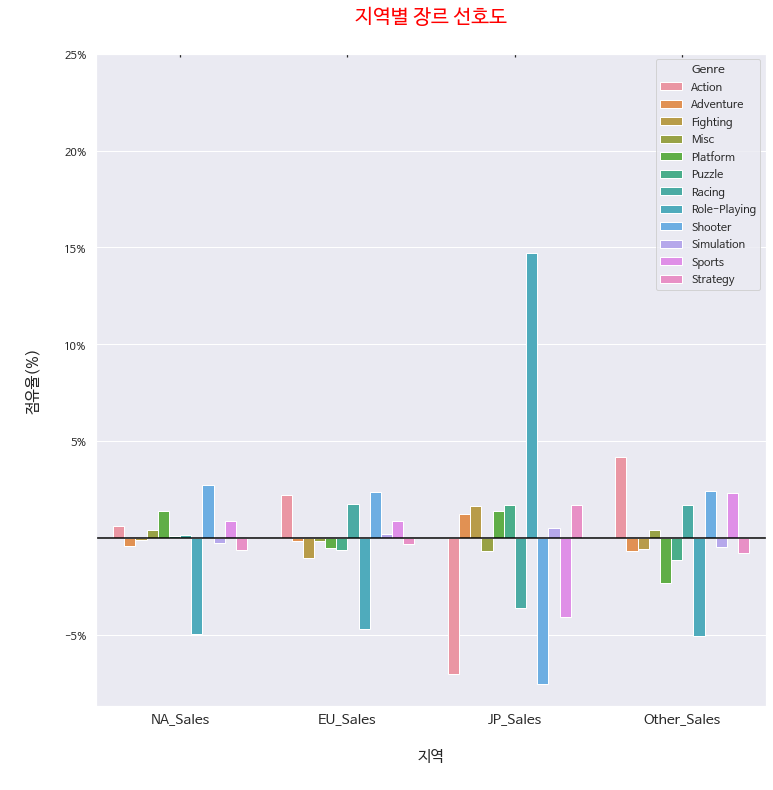

In [ ]:
tdf_Vgame = pd.melt(Diff_NPV,["Genre"], var_name="Region", value_name="Sales")
tdf_Vgame.head()
plt.figure(figsize=(12, 12))
sns.set_theme(style="darkgrid", font = 'NanumBarunGothic', font_scale= 1)
plt.hlines(y = 0, xmin=-0.5,xmax=4.5,linestyles= '-', colors = '#000000')
sns.barplot(x = 'Region',
            y='Sales',
            hue="Genre",
            data=tdf_Vgame)
xticklist, yticklist,xlabellist, ylabellist = [], [],[],[]
for x in range(-1,6) : 
  yticklist.append(x*0.05)
  if (x == 0) :
    ylabellist.append('')
  else :
    ylabellist.append(str(x*5)+'%')
    
plt.yticks(yticklist,ylabellist)
# plt.xticks(xticklist,xlabellist)
plt.rc('font', size=8)
plt.title("지역별 장르 선호도\n", fontsize=20, color = 'Red')
plt.xlabel('\n지역\n', fontsize=15)
plt.ylabel('\n점유율(%)\n', fontsize=15)
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=14, top=True)